<a href="https://colab.research.google.com/github/SyedAnasAli3/Masters-course-ML-projects/blob/main/Softmax_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

N, w, h = digits.images.shape
d = w * h # number of pixels  8x8
c = len(digits.target_names) # number of classes
print(h)

8


In [ ]:
print(c)
print(d)

10
64


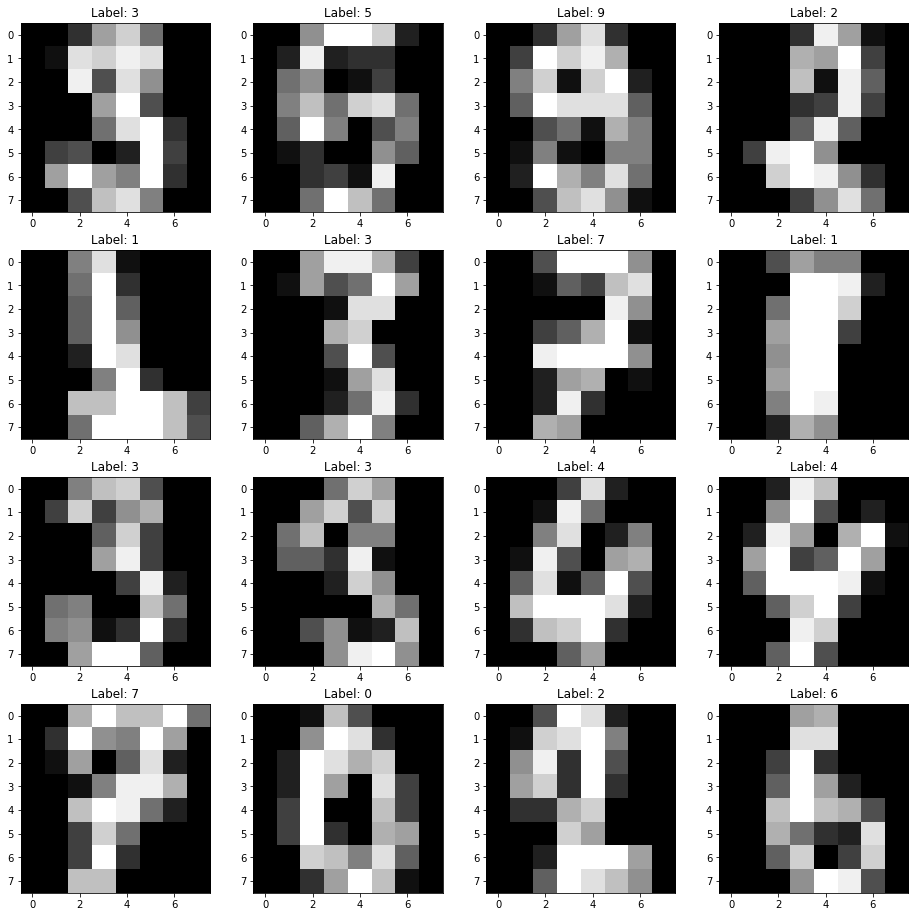

In [ ]:
rng = np.random.default_rng()
indices = rng.choice(N, 16)
plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(digits.images[indices[i], :], cmap="gray")
    plt.title("Label: "+ str(digits.target[indices[i]]))
plt.show()

In [ ]:
X = digits.images.reshape((N, d))
print(X.shape)

(1797, 64)


In [ ]:
labels = digits.target
print(labels)
print(labels.shape)

[0 1 2 ... 8 9 8]
(1797,)


In [ ]:
from sklearn.preprocessing import OneHotEncoder

t = OneHotEncoder().fit_transform(labels.reshape(-1, 1)).toarray()

print(t)
print(t.shape)


[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]
(1797, 10)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

print(N_train, "training samples,", N_test, "test samples.")

1257 training samples, 540 test samples.


In [ ]:
def softmax(z):
    e = np.exp(z - z.max())
    return e/np.sum(e)

In [ ]:
z = np.array([-1, 0, 2])
s = softmax(z)
print(s)

[0.04201007 0.1141952  0.84379473]


probablities

Final training error: 0.0
Final training loss: 0.006737761817905265
Final test error: 0.03333333333333333
Final test loss: 0.03333333333333333


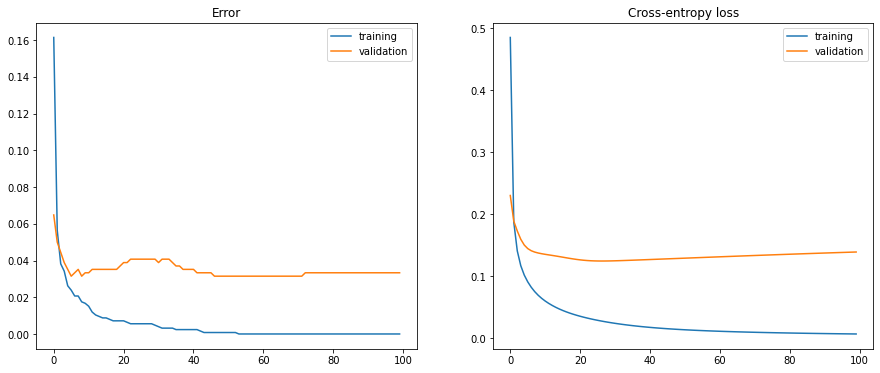

In [ ]:
# Parameters
eta = 0.001
nb_epochs = 100

# Initialize the weight matrix and bias vector
W = np.zeros((c, d))
b = np.zeros(c)

# Perceptron algorithm
training_errors = []
training_losses = []
test_errors = []
test_losses = []

for epoch in range(nb_epochs):
    error = 0
    loss = 0.
    
    # Iterate over all training examples
    for i in range(N_train):
        
        # Prediction logit score
        z = np.dot(W, X_train[i, :]) + b
        
        # Probability
        y = softmax(z)
        
        # Update the weight
        W += eta * np.outer((t_train[i, :] - y), X_train[i, :])
        
        # Update the bias
        b += eta * (t_train[i, :] - y) 
        
        # Increment the error if the maximum probability is different from the class
        if y.argmax() != t_train[i, :].argmax():
            error += 1
        
        # Accumulate the loss
        loss -= np.log(y[t_train[i, :].argmax()])
        
    training_errors.append(error/N_train)
    training_losses.append(loss/N_train)

    # Test error
    error = 0
    loss = 0.

    # Iterate over all test examples
    for i in range(N_test):

        # Prediction
        z = np.dot(W, X_test[i, :]) + b

        # Probability
        y = softmax(z)

        # Increment the error if the maximum probability is different from the class
        if y.argmax() != t_test[i, :].argmax():
           error += 1

        # Accumulate the loss
        loss -= np.log(y[t_test[i, :].argmax()])

    test_errors.append(error/N_test)
    test_losses.append(loss/N_test)

print("Final training error:", training_errors[-1])
print("Final training loss:", training_losses[-1])

print("Final test error:", test_errors[-1])
print("Final test loss:", test_errors[-1])

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(training_errors, label="training")
plt.plot(test_errors, label="validation")
plt.legend()
plt.title("Error")
plt.subplot(122)
plt.plot(training_losses, label="training")
plt.plot(test_losses, label="validation")
plt.legend()
plt.title("Cross-entropy loss")
plt.show()

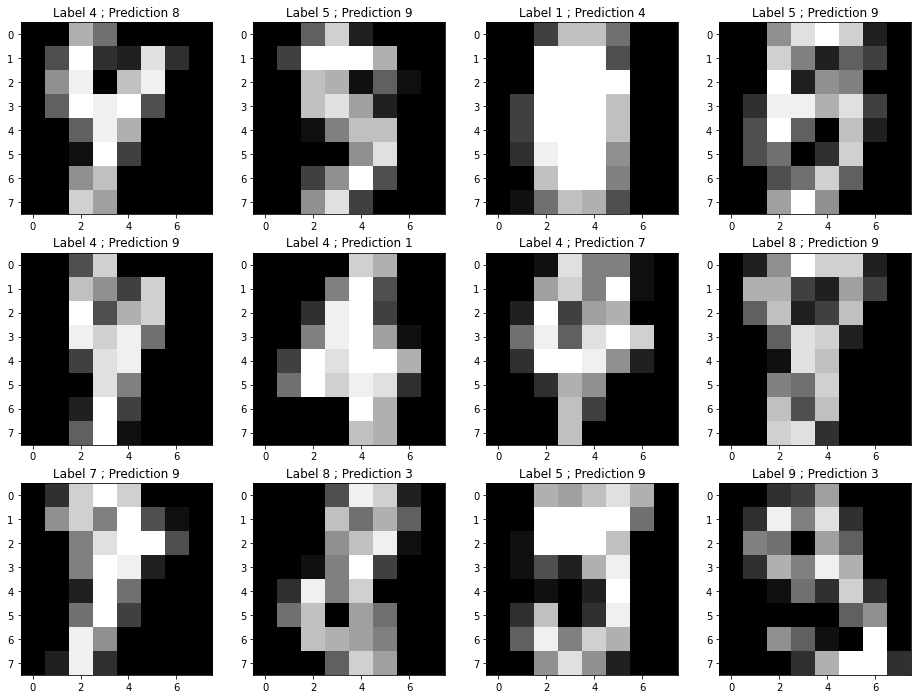

In [ ]:
misclassified = []

for i in range(N_test):
    c = softmax(np.dot(W, X_test[i, :]) + b).argmax()
    if c != t_test[i, :].argmax():  # if there is a misclassification
        misclassified.append([X_test[i, :].reshape((8, 8)), t_test[i, :].argmax(), c])
        if len(misclassified) > 12: break
        
        
plt.figure(figsize=(16, 12))
for i in range(12):
    if i < len(misclassified):
        X, t, c = misclassified[i]  # t is label aka tru class c is Prediction
        plt.subplot(3, 4, i+1)
        plt.imshow(X, cmap="gray")
        plt.title("Label " + str(t) + " ; Prediction " + str(c))
    
plt.show()

 for some misclassified images, the mistakes are quite understandable, so the classifier did a quite good job. Real-world data are never clean, there always are some bad annotations. It is therefore important to use methods that are robust to outliers, such as soft classifiers.